# Python and Friends

This is a very quick run-through of some python syntax

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


##The Python Language

Lets talk about using Python as a calculator...

In [2]:
1+2

3

Notice integer division and floating-point error below!

In [3]:
1/2,1.0/2.0,3*3.2

(0.5, 0.5, 9.600000000000001)

Here is how we can print things. Something on the last line by itself is returned as the output value.

In [4]:
print(1+3.0,"\n",5/3.0)
5/3

4.0 
 1.6666666666666667


1.6666666666666667

We can obtain the type of a variable, and use boolean comparisons tontest these types.

In [5]:
a = 5.0/6.0
print(a)
print(type(a))

0.8333333333333334
<class 'float'>


In [6]:
p = "Python is cool."
print(p)
print(type(p))

Python is cool.
<class 'str'>


In [7]:
type(a) == float

True

In [8]:
type(a) == int

False

## Python and Iteration (and files)

In working with python I always remember: a python is a duck.

What I mean is, python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

But first, lets introduce the notion of a comprehension. Its a way of constructing a list

In [9]:
alist = [1,2,3,4,5]
asquaredlist = [i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

Python has some nifty functions like `enumerate` and `zip`. The former gives a list of tuples with each tuple of the form `(index, value)`, while the latter takes elements from each list and outs them together into a tuple, thus creating a list of tuples. The first is a duck, but the second isnt.

In [10]:
enumerate(asquaredlist),zip(alist, asquaredlist)

(<enumerate at 0xf342a80>, <zip at 0xf3426c0>)

In [11]:
[k for k in enumerate(asquaredlist)]

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

In [12]:
[k for k in zip(alist, asquaredlist)]

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

Open files behave like lists too! Here we get each line in the file and find its length, using the comprehension syntax to put these lengths into a big list.

In [13]:
linelengths = [len(line) for line in open("hamlet.txt")] # poor code as we dont close the file
print(linelengths)

[8, 26, 1, 23, 1, 1, 1, 1, 21, 1, 27, 59, 28, 27, 26, 21, 21, 23, 24, 17, 23, 10, 20, 19, 21, 31, 9, 27, 30, 11, 21, 26, 1, 50, 31, 1, 66, 12, 1, 17, 1, 1, 1, 7, 1, 49, 1, 48, 1, 5, 13, 1, 6, 44, 1, 5, 20, 1, 6, 10, 1, 5, 4, 1, 6, 40, 1, 5, 52, 1, 6, 47, 24, 1, 5, 26, 1, 6, 22, 1, 5, 18, 38, 45, 1, 6, 47, 1, 31, 1, 5, 24, 1, 5, 26, 1, 6, 21, 1, 5, 29, 23, 1, 6, 23, 21, 1, 8, 1, 5, 17, 1, 5, 5, 24, 1, 5, 16, 1, 5, 44, 1, 5, 46, 1, 5, 21, 1, 5, 35, 41, 47, 37, 44, 36, 41, 1, 5, 31, 1, 5, 17, 40, 41, 30, 1, 5, 19, 40, 1, 5, 19, 50, 50, 42, 29, 1, 5, 50, 1, 22, 1, 5, 47, 1, 5, 42, 1, 5, 46, 1, 5, 48, 1, 5, 22, 1, 5, 22, 1, 5, 49, 41, 39, 53, 1, 5, 16, 1, 5, 21, 1, 5, 41, 1, 14, 1, 5, 32, 1, 5, 45, 41, 21, 1, 5, 40, 37, 18, 1, 5, 25, 1, 5, 24, 35, 39, 44, 41, 14, 1, 5, 47, 46, 1, 5, 47, 43, 47, 1, 5, 48, 46, 42, 42, 40, 49, 42, 45, 49, 29, 1, 5, 12, 46, 41, 43, 44, 52, 52, 52, 35, 49, 44, 38, 42, 34, 49, 38, 48, 35, 46, 40, 38, 47, 41, 38, 45, 44, 40, 49, 43, 1, 5, 36, 46, 48, 44, 1, 5, 40,

In [14]:
sum(linelengths), np.mean(linelengths), np.median(linelengths), np.std(linelengths)

(173948, 25.69394387001477, 25.0, 21.02987202142746)

But perhaps we want to access Hamlet word by word and not line by line

In [15]:
hamletfile = open("hamlet.txt")
hamlettext = hamletfile.read()
hamletfile.close()
hamlettokens = hamlettext.split() # split with no arguments splits on whitespace
len(hamlettokens)

31659

One can use the `with` syntax which creates a context. The file closing is then done automatically for us.

In [16]:
with open("hamlet.txt") as hamletfile:
    hamlettext = hamletfile.read()
    hamlettokens = hamlettext.split()
    print(len(hamlettokens))

31659


There are roughly 32,000 words in Hamlet.

###The indexing of lists

In [17]:
print(hamlettext[:1000]) # first 1000 characters from Hamlet.

ï»¿XXXX
HAMLET, PRINCE OF DENMARK

by William Shakespeare




PERSONS REPRESENTED.

Claudius, King of Denmark.
Hamlet, Son to the former, and Nephew to the present King.
Polonius, Lord Chamberlain.
Horatio, Friend to Hamlet.
Laertes, Son to Polonius.
Voltimand, Courtier.
Cornelius, Courtier.
Rosencrantz, Courtier.
Guildenstern, Courtier.
Osric, Courtier.
A Gentleman, Courtier.
A Priest.
Marcellus, Officer.
Bernardo, Officer.
Francisco, a Soldier
Reynaldo, Servant to Polonius.
Players.
Two Clowns, Grave-diggers.
Fortinbras, Prince of Norway.
A Captain.
English Ambassadors.
Ghost of Hamlet's Father.

Gertrude, Queen of Denmark, and Mother of Hamlet.
Ophelia, Daughter to Polonius.

Lords, Ladies, Officers, Soldiers, Sailors, Messengers, and other
Attendants.

SCENE. Elsinore.



ACT I.

Scene I. Elsinore. A platform before the Castle.

[Francisco at his post. Enter to him Bernardo.]

Ber.
Who's there?

Fran.
Nay, answer me: stand, and unfold yourself.

Ber.
Long live the king!

Fran.
Bern

In [18]:
print(hamlettext[-1000:]) # and last 1000 characters from Hamlet.

on by cunning and forc'd cause;
And, in this upshot, purposes mistook
Fall'n on the inventors' heads: all this can I
Truly deliver.

Fort.
Let us haste to hear it,
And call the noblest to the audience.
For me, with sorrow I embrace my fortune:
I have some rights of memory in this kingdom,
Which now, to claim my vantage doth invite me.

Hor.
Of that I shall have also cause to speak,
And from his mouth whose voice will draw on more:
But let this same be presently perform'd,
Even while men's minds are wild: lest more mischance
On plots and errors happen.

Fort.
Let four captains
Bear Hamlet like a soldier to the stage;
For he was likely, had he been put on,
To have prov'd most royally: and, for his passage,
The soldiers' music and the rites of war
Speak loudly for him.--
Take up the bodies.--Such a sight as this
Becomes the field, but here shows much amiss.
Go, bid the soldiers shoot.

[A dead march.]

[Exeunt, bearing off the dead bodies; after the which a peal of
ordnance is shot off.]


Lets split the word tokens. The first one below reads, give me the second, third, and fourth words (remember that python is 0 indexed). Try and figure what the others mean.

hamlettokens[:4] means the first 4 words not including word index 3.

hamlettokens[0] means just the first word, and hamlettokens[-1] means just the last word.

In [19]:
print(hamlettokens[1:4], hamlettokens[:4], hamlettokens[0], hamlettokens[-1])

['HAMLET,', 'PRINCE', 'OF'] ['ï»¿XXXX', 'HAMLET,', 'PRINCE', 'OF'] ï»¿XXXX off.]


In [20]:
print(hamlettokens[1:8:2]) # get every 2nd word between the 2nd and the 9th: ie 2nd, 4th, 6th, and 8th
print(hamlettokens[1:8])

['HAMLET,', 'OF', 'by', 'Shakespeare']
['HAMLET,', 'PRINCE', 'OF', 'DENMARK', 'by', 'William', 'Shakespeare']


range and xrange get the list of integers upto N. But xrange behaves like an iterator. The reason for this is that there is no point generaing all os a million integers. We can just add 1 to the previous one and save memory. So we trade off storage for computation.

In [21]:
mylist = []
for i in range(10):
    mylist.append(i)
mylist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Dictionaries

These are the bread and butter. You will use them a lot. They even duck like lists. But be careful how.

In [22]:
adict = {'one':1, 'two': 2, 'three': 3}
print([i for i in adict], [(k,v) for k,v in adict.items()], adict.values())

['one', 'two', 'three'] [('one', 1), ('two', 2), ('three', 3)] dict_values([1, 2, 3])


The keys do not have to be strings. You can use dictionary comprehensions as well

In [23]:
mydict = {k:v for (k,v) in zip(alist, asquaredlist)}
mydict

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

You can construct then nicely using the function `dict`.

In [24]:
dict(a = 1, b = 2)

{'a': 1, 'b': 2}

###and conversion to json

In [25]:
import json

In [26]:
s = json.dumps(mydict)
print(s)

{"1": 1, "2": 4, "3": 9, "4": 16, "5": 25}


In [27]:
json.loads(s)

{'1': 1, '2': 4, '3': 9, '4': 16, '5': 25}

## Strings

Basically they behave like immutable lists

In [28]:
lastword = hamlettokens[-1]
print(lastword)

off.]


In [29]:
lastword[-2] = "k" # Error: can't change a part of a string

TypeError: 'str' object does not support item assignment

In [30]:
lastword[-2]

'.'

You can join a list with a separator to make a string.

In [31]:
wierdstring = ",".join(hamlettokens)
wierdstring[:1000]

"ï»¿XXXX,HAMLET,,PRINCE,OF,DENMARK,by,William,Shakespeare,PERSONS,REPRESENTED.,Claudius,,King,of,Denmark.,Hamlet,,Son,to,the,former,,and,Nephew,to,the,present,King.,Polonius,,Lord,Chamberlain.,Horatio,,Friend,to,Hamlet.,Laertes,,Son,to,Polonius.,Voltimand,,Courtier.,Cornelius,,Courtier.,Rosencrantz,,Courtier.,Guildenstern,,Courtier.,Osric,,Courtier.,A,Gentleman,,Courtier.,A,Priest.,Marcellus,,Officer.,Bernardo,,Officer.,Francisco,,a,Soldier,Reynaldo,,Servant,to,Polonius.,Players.,Two,Clowns,,Grave-diggers.,Fortinbras,,Prince,of,Norway.,A,Captain.,English,Ambassadors.,Ghost,of,Hamlet's,Father.,Gertrude,,Queen,of,Denmark,,and,Mother,of,Hamlet.,Ophelia,,Daughter,to,Polonius.,Lords,,Ladies,,Officers,,Soldiers,,Sailors,,Messengers,,and,other,Attendants.,SCENE.,Elsinore.,ACT,I.,Scene,I.,Elsinore.,A,platform,before,the,Castle.,[Francisco,at,his,post.,Enter,to,him,Bernardo.],Ber.,Who's,there?,Fran.,Nay,,answer,me:,stand,,and,unfold,yourself.,Ber.,Long,live,the,king!,Fran.,Bernardo?,Ber.,He.,Fr

## Functions

Functions are even more the bread and butter. You'll see them as methods on objects, or standing alone by themselves.

In [32]:
def square(x):
    return(x*x)
def cube(x):
    return x*x*x
square(5),cube(5)

(25, 125)

In [33]:
def sqrt(x):
    return x**(1/2)
sqrt(4), sqrt(14), sqrt(16)

(2.0, 3.7416573867739413, 4.0)

In [34]:
print(square, type(cube))

<function square at 0x0F3CF228> <class 'function'>


In Python, functions are "first-class". This is just a fancy way of saying, you can pass functions to other functions

In [35]:
def sum_of_anything(x,y,f):
    print(x,y,f)
    return(f(x) + f(y))
sum_of_anything(3,4,square)

3 4 <function square at 0x0F3CF228>


25

Python functions can have positional arguments and keyword arguments. Positional arguments are stored in a tuple, and keyword arguments in a dictionary. Note the "starred" syntax

In [36]:
def f(a,b,*posargs,**dictargs):
    print("got",a,b,posargs, dictargs)
    return a
print(f(1,3))
print(f(1,3,4,d=1,c=2))

got 1 3 () {}
1
got 1 3 (4,) {'d': 1, 'c': 2}
1


>**YOUR TURN** create a dictionary with keys the integers upto and including 10, and values the cubes of these dictionaries

In [37]:
#your code here
myList1 = []
for i in range(11):
    myList1.append(i)

cubedList = [i*i*i for i in myList1]

cubeDict = {k:v for (k,v) in zip(myList1, cubedList)}
cubeDict
print(cubeDict)

{0: 0, 1: 1, 2: 8, 3: 27, 4: 64, 5: 125, 6: 216, 7: 343, 8: 512, 9: 729, 10: 1000}


##Booleans and Control-flow

Lets test for belonging...

In [38]:
a = [1,2,3,4,5]
1 in a

True

In [39]:
6 in a

False

Python supports if/elif/else clauses for multi-way conditionals

In [40]:
def do_it(x):
    if x==1:
        print("One")
    elif x==2:
        print("Two")
    else:
        print(x)
do_it(1)

One


In [41]:
do_it(2), do_it(3)

Two
3


(None, None)

You can `break` out of a loop based on a condition. The loop below is a for loop.

In [42]:
for i in range(10):
    print(i)
    if (i > 5):
        break

0
1
2
3
4
5
6


While loops are also supported. `continue` continues to the next iteration of the loop skipping all the code below, while `break` breaks out of it.

In [43]:
i=0
while i < 10:
    print(i)
    i=i+1
    if i < 5:
        continue
    else:
        break

0
1
2
3
4


## Exceptions

This is the way to catch errors.

In [44]:
import sys
try:
    f(1) # takes at least 2 arguments
except:
    print(sys.exc_info())

(<class 'TypeError'>, TypeError("f() missing 1 required positional argument: 'b'"), <traceback object at 0x0F3ECCB0>)


## All together now

Let's see what hamlet gives us. We convert all words to lower-case.

In [45]:
hamletlctokens = [word.lower() for word in hamlettokens]
hamletlctokens.count("thou")

95

We then find a unique set of words using python's `set` data structure. We count how often those words occured using the `count` method on lists.

In [46]:
uniquelctokens = set(hamletlctokens)

In [47]:
tokendict = {}
for ut in uniquelctokens:
    tokendict[ut] = hamletlctokens.count(ut)

In [48]:
tokendict

{'resolutes,': 1,
 "season'd": 1,
 'troubles,': 1,
 'blank': 1,
 'anon': 4,
 'tender': 3,
 'further': 9,
 'star,--': 1,
 'afar': 1,
 'think.': 2,
 'amen!': 1,
 'them': 44,
 'givers': 1,
 'scholar;': 1,
 'witchcraft': 2,
 'does': 25,
 'ï»¿xxxx': 1,
 'greeks:': 1,
 'poet': 1,
 'guard?': 1,
 'encounter': 1,
 'die': 2,
 'sensible': 1,
 'top': 6,
 'voice;': 1,
 'stairs': 1,
 'retrograde': 1,
 'origin,--': 1,
 'usurp': 1,
 'murder,--': 1,
 'by': 111,
 '[behind.]': 2,
 'fair?': 1,
 'reasons,': 1,
 'trophy,': 1,
 'off,': 3,
 'dirt?': 1,
 "know't,": 1,
 '[within]': 1,
 'especially,': 1,
 'prey': 1,
 'low': 1,
 'bloody': 5,
 'do?': 3,
 'small': 1,
 'murder!': 2,
 'blessing,': 1,
 'rey.': 13,
 'noise': 6,
 'beasts,': 1,
 'shaking': 1,
 'wanton': 2,
 'question:--': 1,
 'live,': 1,
 'target;': 1,
 'rites,': 1,
 'of,': 1,
 'resolution': 1,
 'steward,': 1,
 'ever': 11,
 'beshrew': 1,
 'march.': 1,
 'debate': 1,
 'comes!': 1,
 'fie!': 2,
 'osric': 1,
 'lost:': 1,
 'reveal': 1,
 'ear,': 3,
 'king:': 4,

We find the 100 most used words...

In [49]:
L = sorted(tokendict.items(), key=lambda item: item[1], reverse=True)[:100]
L

[('the', 1136),
 ('and', 943),
 ('to', 720),
 ('of', 667),
 ('a', 527),
 ('my', 512),
 ('i', 510),
 ('in', 420),
 ('you', 412),
 ('ham.', 358),
 ('that', 337),
 ('it', 324),
 ('is', 320),
 ('his', 295),
 ('not', 270),
 ('with', 264),
 ('this', 250),
 ('your', 241),
 ('for', 231),
 ('but', 228),
 ('as', 216),
 ('he', 202),
 ('be', 201),
 ('what', 183),
 ('have', 174),
 ('will', 149),
 ('so', 143),
 ('me', 142),
 ('we', 132),
 ('do', 128),
 ('are', 126),
 ('him', 122),
 ('our', 119),
 ('king.', 113),
 ('by', 111),
 ('hor.', 110),
 ('or', 109),
 ('on', 109),
 ('if', 109),
 ('no', 107),
 ('shall', 106),
 ('from', 95),
 ('all', 95),
 ('thou', 95),
 ('they', 93),
 ('let', 92),
 ('good', 88),
 ('at', 86),
 ('thy', 86),
 ('pol.', 86),
 ('how', 84),
 ('most', 82),
 ('lord,', 81),
 ('queen.', 76),
 ('her', 76),
 ('more', 76),
 ('like', 75),
 ('would', 74),
 ('was', 73),
 ("'tis", 70),
 ('you,', 66),
 ('may', 65),
 ('very', 64),
 ('hath', 62),
 ('laer.', 62),
 ('[enter', 61),
 ('lord.', 60),
 ('d

Lets get the top 20 of this and plot a bar chart!

[('the', 1136), ('and', 943), ('to', 720), ('of', 667), ('a', 527), ('my', 512), ('i', 510), ('in', 420), ('you', 412), ('ham.', 358), ('that', 337), ('it', 324), ('is', 320), ('his', 295), ('not', 270), ('with', 264), ('this', 250), ('your', 241), ('for', 231), ('but', 228)]


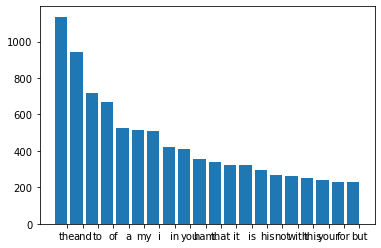

In [50]:
topfreq = L[:20]
print(topfreq)
pos = np.arange(len(topfreq))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos+0.4, [e[0] for e in topfreq]);